In [758]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [759]:
img = cv.imread('foreground/fg-4.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [760]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)


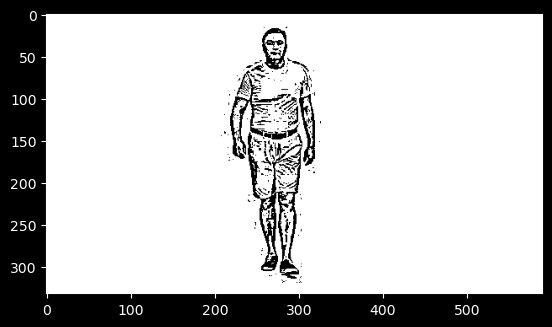

In [761]:
plt.imshow(binary_mask, cmap='gray')

In [762]:
binary_mask = cv.bitwise_not(binary_mask)

In [763]:
cv.fastNlMeansDenoising(binary_mask, binary_mask, 35, 10, 25)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [764]:
binary_mask = cv.erode(binary_mask, (17,17), iterations=1)
binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

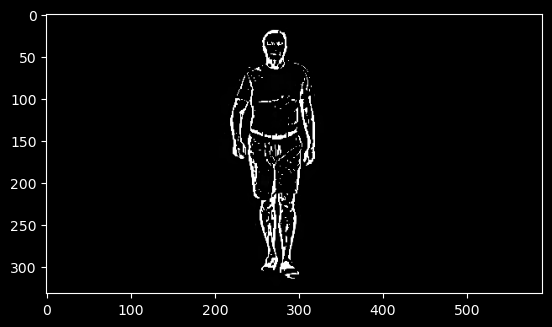

In [765]:
plt.imshow(binary_mask, cmap='gray')


In [766]:
binary_mask = cv.bitwise_not(binary_mask)

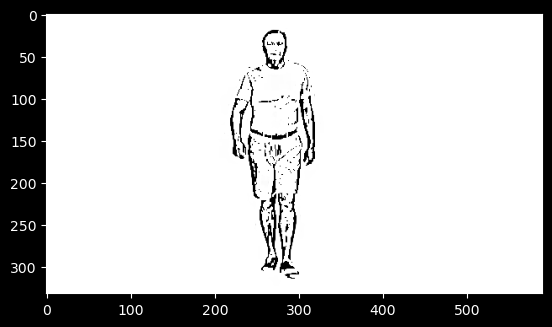

In [767]:
plt.imshow(binary_mask, cmap='gray')

In [768]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [769]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [770]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [771]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[ 9.61941812e-01,  5.55756245e-06,  0.00000000e+00,
          3.44624448e-02,  3.59018534e-03,  4.20000000e+01,
          2.55000000e+02,  1.59158325e+02,  1.33000000e+02,
          1.45000000e+02,  1.73000000e+02,  2.00709033e+02,
          1.97753591e+02,  2.07090334e+02,  4.80446702e+01,
          2.54741493e+02,  1.62714240e+02,  8.72523220e+01,
          2.20634675e+02,  1.66730650e+02,  1.00000000e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  3.72853719e-01,  1.00000000e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e-02,  2.03416434

In [772]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [773]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

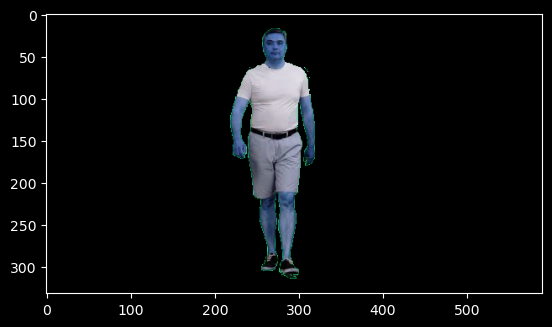

In [774]:
plt.imshow(segmented_image)

In [775]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [776]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

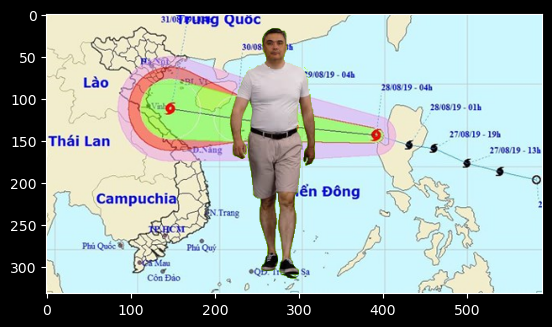

In [777]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)